In [1]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy

--2021-03-01 13:11:44--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-01 13:11:44--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-01 13:11:45--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 10000)

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.components_.shape)

(30, 10000)


In [6]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows<2 else 10
  fig, axs = plt.subplots(rows, cols,
                          figsize= (cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j < n :
        axs[i, j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()

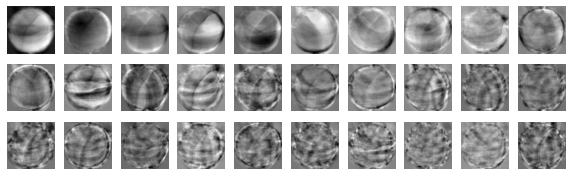

In [12]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [13]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 30)


In [15]:
from sklearn.linear_model import LogisticRegression as lrr
lr = lrr()

In [16]:
target = np.array([0]*100 + [1]*100 + [2]*100)

In [17]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.4297420978546143


In [18]:

scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02740483283996582
